In [8]:
from lorsi import LoRSI
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load data and define columns

In [43]:
# path to data in csv format
DATA_PATH = r'example_data.csv'
# DATA_PATH = r'../NEJMoa1201622/NEJMoa1201622.csv'
# DATA_PATH = r'../NEJMoa1610057/NEJMoa1610057.csv'
# DATA_PATH = r'../NEJMoa1903765/Moa1903765.csv'

# relevant columns name
event_col = 'event'
time_col = 'time'
group_col = 'group'

# Create Lorsi
lorsi = LoRSI(DATA_PATH, event_col, time_col, group_col)

### Plot KM

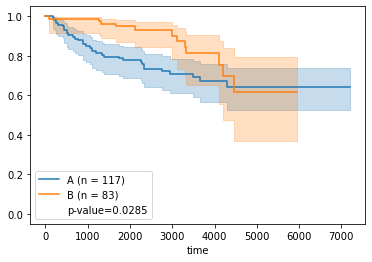

In [44]:
lorsi.plot_original_KM()

In [45]:
# Set better survival group
lorsi.update_data_filter('A')

In [47]:
number_of_changes = 0 # alpha = number_of_changes / n
method = 'griddy' # efficient or BF or griddy

In [48]:
lorsi.calc_interval(number_of_changes, delta=0, delta_model='LEFT', method=method, parallel=False);

ORIGINAL p-values: 0.028497932392004353
MIN p-value      : 0.028497932392004353
MAX p-value      : 0.028497932392004353
Running time (seconds): 0.04736804962158203


### Compare time calculation between efficient and griddy methods

In [50]:
df_time_compare = lorsi.compare_methods(min_number_of_changes=1,max_number_of_changes=20,parallel=True)
fig = px.line(df, x="Number_of_changes", y="RUNNING time", color='Method', markers=True)
fig.show()
df_time_compare.head()

,Number_of_changes,Method,ORIGINAL_pvalue,MIN_pvalue,MAX_pvalue,RUNNING time
0,1,griddy,0.028498,0.017634,0.045444,0.129730
1,1,efficient,0.028498,0.017634,0.045444,0.111442
2,2,griddy,0.028498,0.010017,0.073404,0.191600
3,2,efficient,0.028498,0.010017,0.073404,0.191482
4,3,griddy,0.028498,0.005333,0.114917,0.274619


### Explore alpha rejection

In [51]:
df_find_alpha = lorsi.explore_alpha_rejection_null_hypothesis(max_number_of_changes=5, method='griddy', parallel=True);
df_find_alpha.head()

,Number_of_changes,MIN_pvalue,MAX_pvalue
0,1,0.017634,0.045444
1,2,0.010017,0.073404
2,3,0.005333,0.114917
3,4,0.002583,0.178809
4,5,0.001171,0.267200


ORIGINAL P-vlaue: 0.028497932392004353


,Number_of_changes,MIN_pvalue,MAX_pvalue
0,1,0.017634,0.045444
1,2,0.010017,0.073404
2,3,0.005333,0.114917
3,4,0.002583,0.178809
4,5,0.001171,0.267200
